In [8]:
%run ../MLHCExperiment-Common-Val17Test18.ipynb

In [2]:
all_visits = read_data()
all_visits = all_visits.where(all_visits["AdjCount"] > 0).dropna()

In [6]:
def run_one_month_ahead_nn(filename, name, features, label):
    print(name)
    
    X = all_visits[features]
    y = all_visits[label]
    
    mses = list()

    X_train, y_train, X_val, y_val, X_test, y_test = split_for_baseline_and_nn(X, y)

    start = time.time()
    predictions = list()

    model = compile_nn_weights_from_file(filename, X_train, 64, 64)

    for i in range(9):
        _, next_date, end_date = get_split_dates(i)
        if i == 0:
            model.fit(X_val, y_val.values, epochs=1, shuffle=False,
                                verbose=0)
        if i > 0:
            _, val_start, val_end = get_split_dates(i - 1)
            model.fit(X_test.loc[val_start:val_end], 
                      y_test.loc[val_start:val_end].values, epochs=1, shuffle=False,
                      verbose=0)

        y_pred = model.predict(X_test.loc[next_date:end_date], batch_size=1)
        predictions.extend(y_pred)

    mses.append(mean_squared_error(predictions, y_test))
    end = time.time()
    print("Trial completed in %.2f s" % (end - start))
    print("Average MSE so far: %.3f (%.3f)" % (np.mean(mses), np.std(mses)))
    
    y_pred = np.array(predictions).flatten()
    
    fig, ax = plt.subplots(figsize=(15,7))
    ax.set(title=name, xlabel='Date', ylabel='Sick Visits Per FTE')
    all_visits.loc[TEST_START:, label].plot(ax=ax, color='gray', style='.', label='actual sick visits/fte')
    plt.scatter(all_visits.loc[TEST_START:].index, y_pred, color='r',label='predicted sick visits/fte')
    plt.legend()
    return mses, y_pred

NNModels/64-64Best/Dynamic-NN-AllVisits-64-64-Trial0-1562302673.171411.h5
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Trial completed in 2.03 s
Average MSE so far: 1.244 (0.000)
NNModels/64-64Best/Dynamic-NN-AllVisits-64-64-Trial4-1562302927.789633.h5
Trial completed in 2.23 s
Average MSE so far: 1.204 (0.000)
NNModels/64-64Best/Dynamic-NN-AllVisits-64-64-Trial1-1562302733.186472.h5
Trial completed in 2.73 s
Average MSE so far: 1.238 (0.000)
NNModels/64-64Best/Dynamic-NN-AllVisits-64-64-Trial3-1562302863.757526.h5
Trial completed in 2.81 s
Average MSE so far: 1.295 (0.000)
NNModels/64-64Best/Dynamic-NN-AllVisits-64-64-Trial2-1562302795.191118.h5
Trial completed in 3.13 s
Average MSE so far: 1.243 (0.000)
MSE and RMSE over 10 trials with standard deviation in parentheses
Average MSE: 1.245 (0.029)
Average RMSE: 1.116 (0.013)


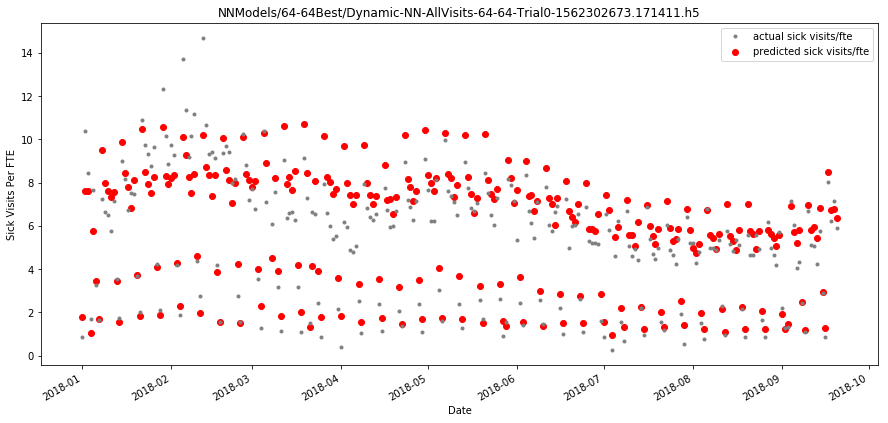

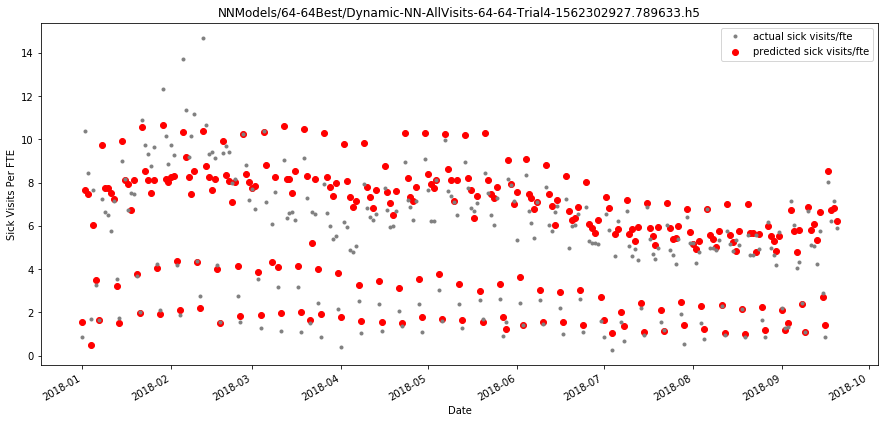

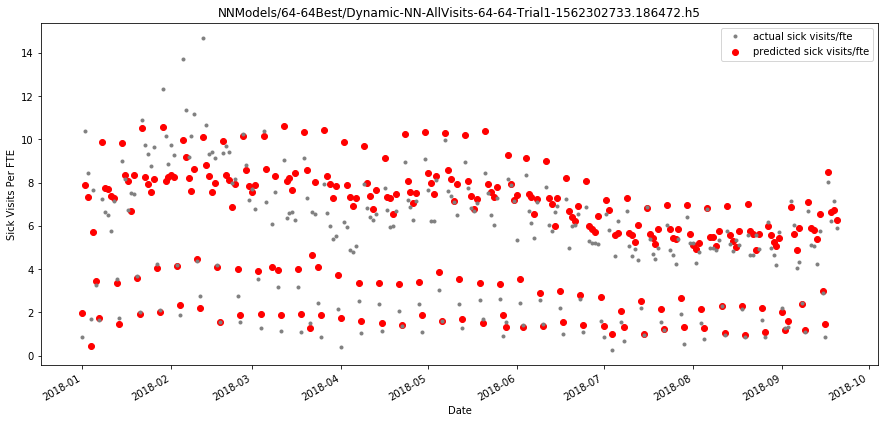

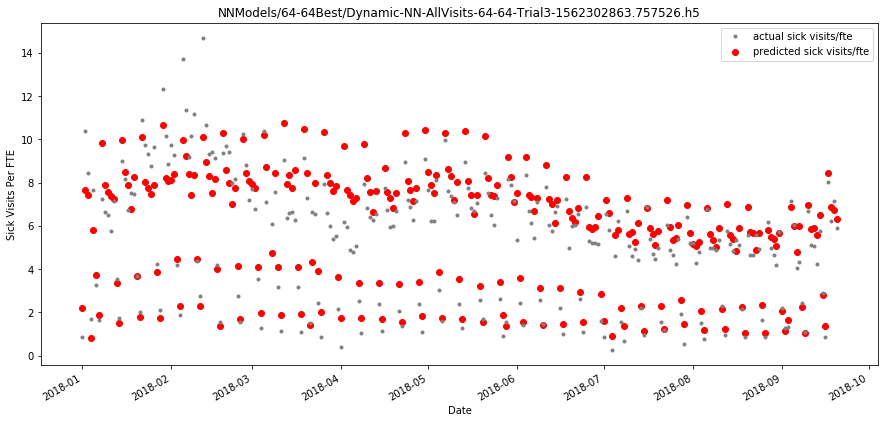

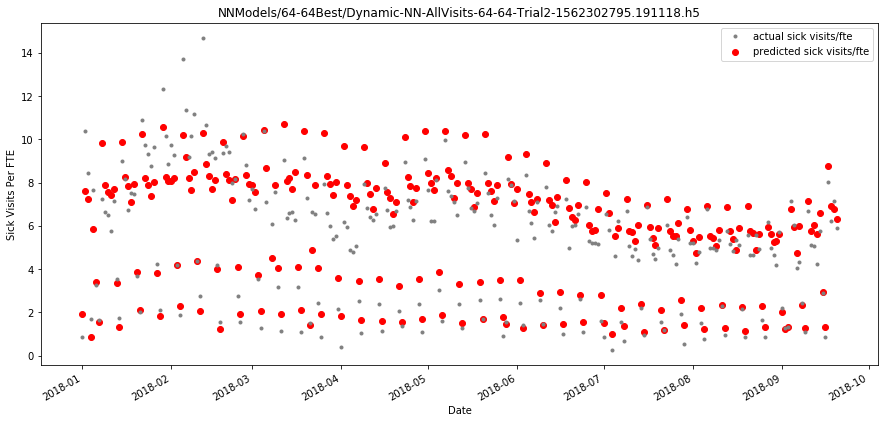

In [5]:
filenames = prebuilt_nn_models["64-64"]

mses = list()

for filename in filenames:
    mse, _ = run_one_month_ahead_nn("../" + filename, filename, BASE_FEATURES, ALL_VISITS_LABEL)
    mses.append(mse)

print_mse_metrics(mses)

NNModels/64-64Resp/Dynamic-NN-RespVisits-64-64-Trial2-1562368216.3867679.h5
Trial completed in 11.41 s
Average MSE so far: 0.464 (0.000)
NNModels/64-64Resp/Dynamic-NN-RespVisits-64-64-Trial0-1562368090.3568761.h5
Trial completed in 12.45 s
Average MSE so far: 0.455 (0.000)
NNModels/64-64Resp/Dynamic-NN-RespVisits-64-64-Trial3-1562368299.999485.h5
Trial completed in 11.80 s
Average MSE so far: 0.463 (0.000)
NNModels/64-64Resp/Dynamic-NN-RespVisits-64-64-Trial4-1562368366.227404.h5
Trial completed in 11.56 s
Average MSE so far: 0.466 (0.000)
NNModels/64-64Resp/Dynamic-NN-RespVisits-64-64-Trial1-1562368146.8525062.h5
Trial completed in 11.75 s
Average MSE so far: 0.468 (0.000)
MSE and RMSE over 10 trials with standard deviation in parentheses
Average MSE: 0.463 (0.004)
Average RMSE: 0.681 (0.003)


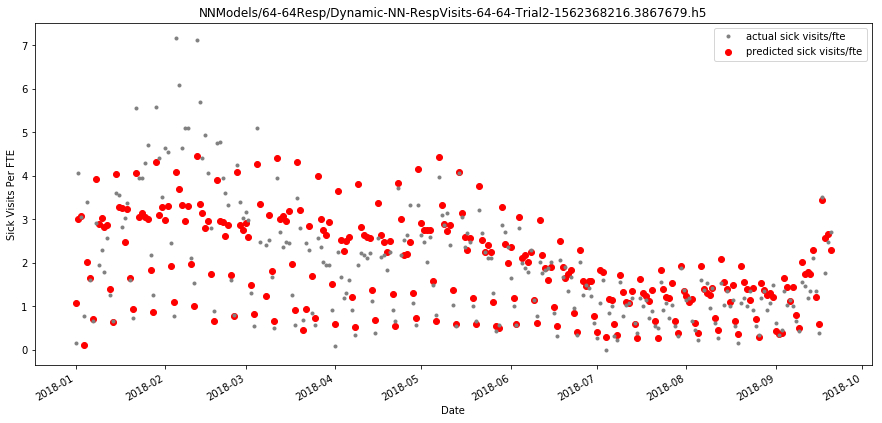

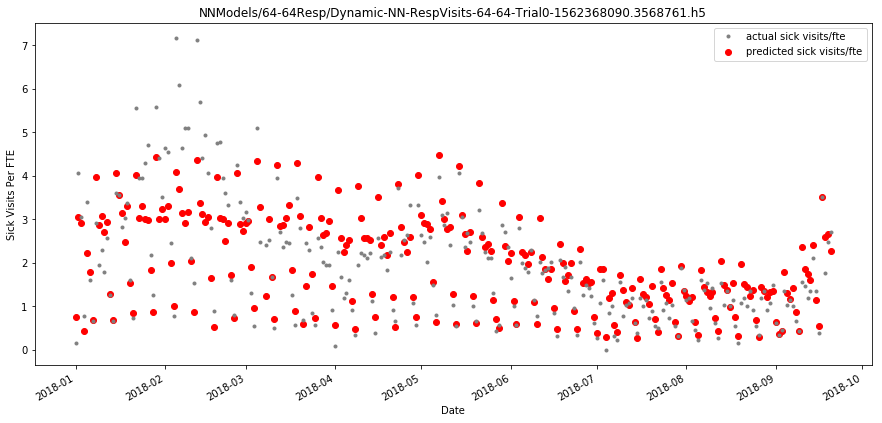

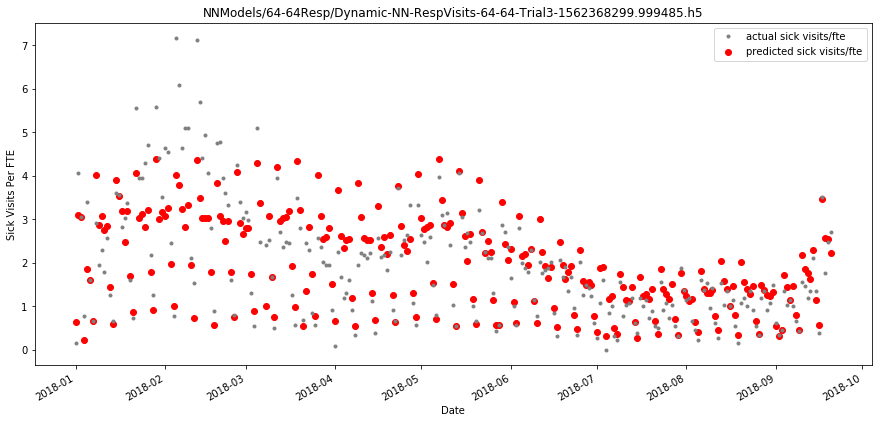

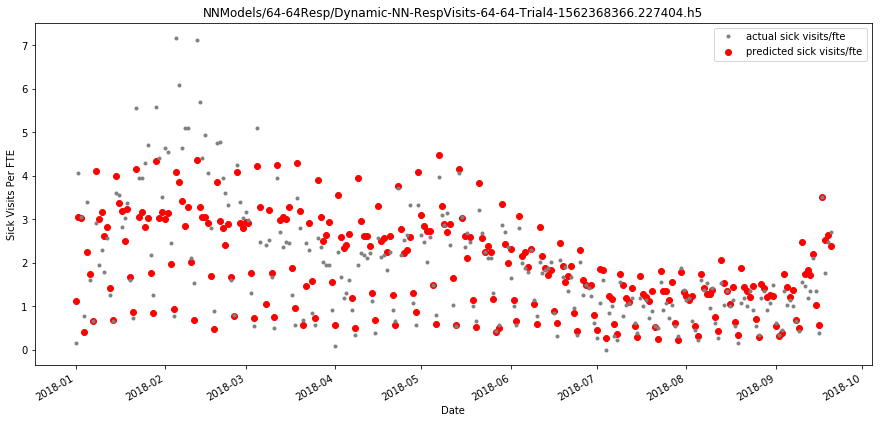

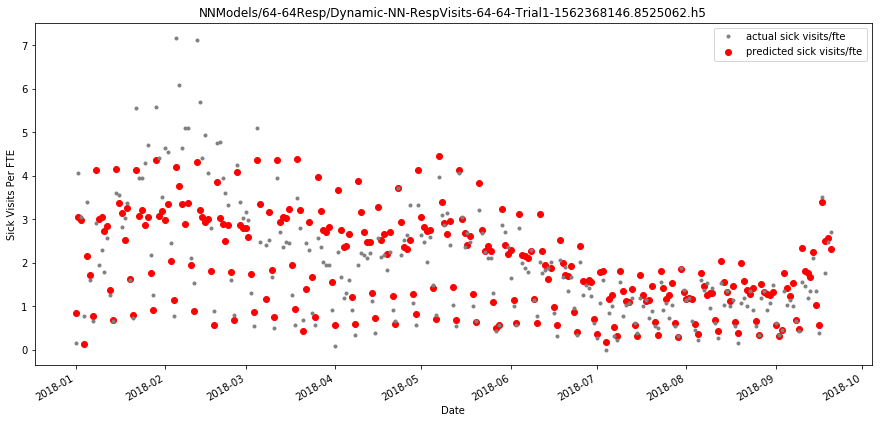

In [13]:
filenames_r = prebuilt_nn_models["64-64R"]

mses_r = list()

for filename in filenames_r:
    mse, _ = run_one_month_ahead_nn("../" + filename, filename, BASE_FEATURES, ICD8_LABEL)
    mses_r.append(mse)

print_mse_metrics(mses_r)

NNModels/64-64NonResp/Dynamic-NN-NonRespVisits-64-64-Trial0-1562368401.0504398.h5
Trial completed in 13.20 s
Average MSE so far: 0.457 (0.000)
NNModels/64-64NonResp/Dynamic-NN-NonRespVisits-64-64-Trial3-1562368511.382907.h5
Trial completed in 14.45 s
Average MSE so far: 0.409 (0.000)
NNModels/64-64NonResp/Dynamic-NN-NonRespVisits-64-64-Trial4-1562368552.901161.h5
Trial completed in 13.25 s
Average MSE so far: 0.402 (0.000)
NNModels/64-64NonResp/Dynamic-NN-NonRespVisits-64-64-Trial1-1562368437.986389.h5
Trial completed in 14.85 s
Average MSE so far: 0.459 (0.000)
NNModels/64-64NonResp/Dynamic-NN-NonRespVisits-64-64-Trial2-1562368474.3667378.h5
Trial completed in 14.81 s
Average MSE so far: 0.421 (0.000)
MSE and RMSE over 10 trials with standard deviation in parentheses
Average MSE: 0.430 (0.024)
Average RMSE: 0.655 (0.018)


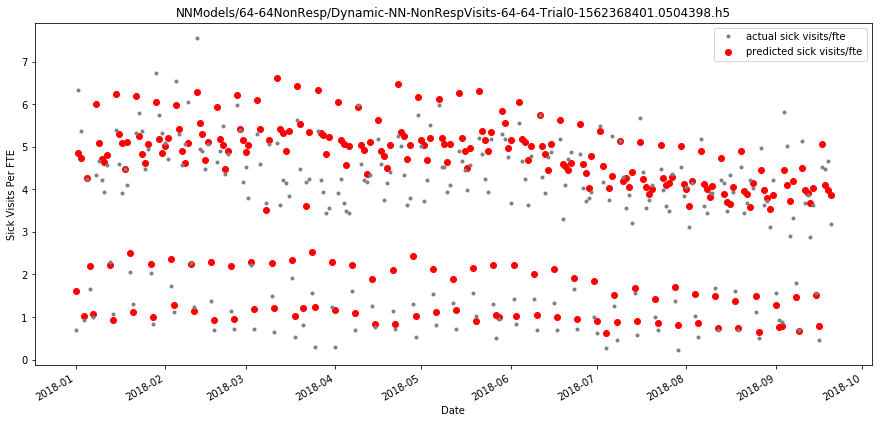

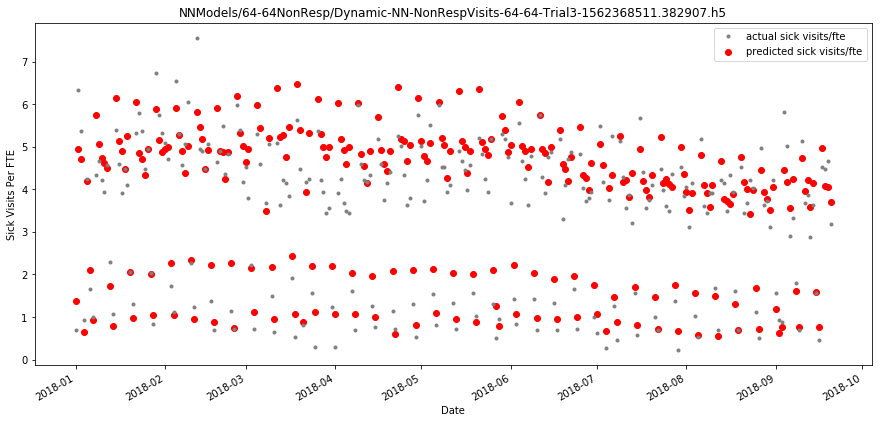

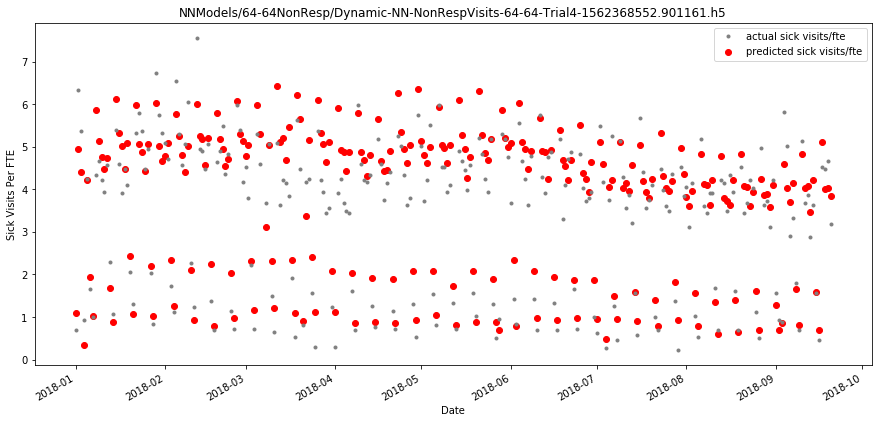

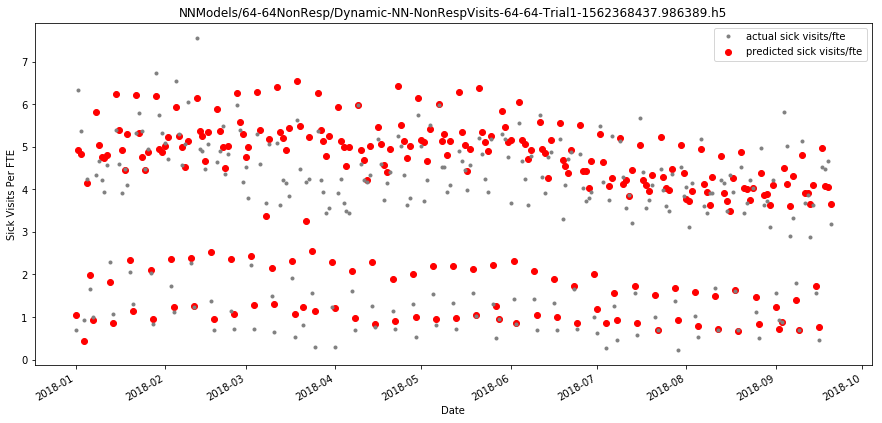

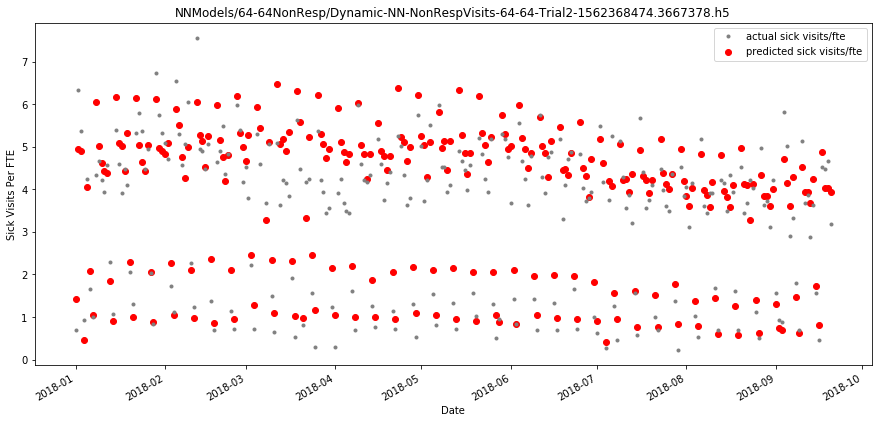

In [14]:
filenames_nr = prebuilt_nn_models["64-64NR"]

mses_nr = list()

for filename in filenames_nr:
    mse, _ = run_one_month_ahead_nn("../" + filename, filename, BASE_FEATURES, ICD8OPP_LABEL)
    mses_nr.append(mse)

print_mse_metrics(mses_nr)